In [ ]:
import pandas as pd

# MR_1 DATASET

In [ ]:
df = pd.read_csv("/content/data_MR_1.csv")

In [ ]:
df.shape

(377580, 3)

In [ ]:
df.dtypes

,0
x,float64
y,float64
z,float64


In [ ]:
df.isnull().sum()

,0
x,0
y,0
z,0


### No preprocessing required

## Apply K-means on MR_1

In [ ]:
X = df

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(X,test_size=0.3,
                                  random_state=7)

In [ ]:
X_train.shape,X_test.shape

((264306, 3), (113274, 3))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
mk = KMeans(3, max_iter=100, random_state=7)

In [ ]:
mk.fit(X_train)

KMeans(max_iter=100, n_clusters=3, random_state=7)

In [ ]:
y_pred = mk.predict(X_test)

## Apply Hierarchical Clustering (Agglomarative clustering) on MR_1

### Create Dendrogram

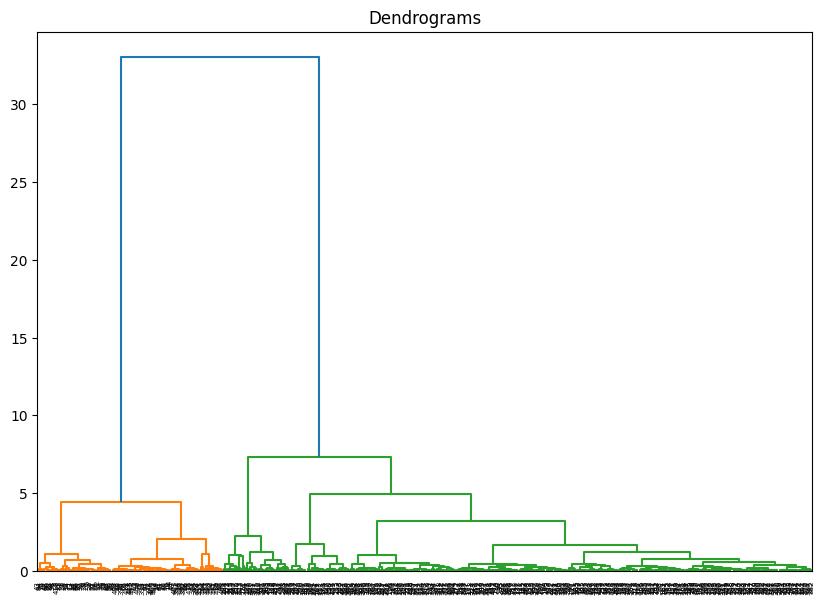

In [ ]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X.iloc[:500,:], method='ward'))
plt.axhline(y=50, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac = AgglomerativeClustering(2)

In [ ]:
ac.fit(X_train.iloc[:500,:])

AgglomerativeClustering()

In [ ]:
ac.fit_predict(X_train.iloc[:500,:])

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
# ac.predict() # prediction on test data not supported

## Apply DBSCAN in MR_1

### before DBSCAN standardize the dataset


standard scaler / z-score = ( x - mu ) / std_dev

In [ ]:
X_train_std = (X_train - X_train.mean() ) / X_train.std()

In [ ]:
X_train_std.mean() , X_train_std.std()

(x   -3.013084e-16
 y    2.007648e-16
 z    1.052429e-15
 dtype: float64,
 x    1.0
 y    1.0
 z    1.0
 dtype: float64)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps = 0.2  )

In [ ]:
db.fit( X_train_std.iloc[:500,:] )

DBSCAN(eps=0.2)

In [ ]:
db.fit_predict( X_train_std.iloc[:500,:] )

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,
        0,  2,  1,  0,  0

# Practice : Apply same algorithms on MR_2 dataset

#How to decide right K in K means

- we use l-bow method

- We will plot inertia values for k=2 ... 10

- Check in the graph where there is a sharp change (l-bow), this value of k is finalized

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia_values = []
for k in range(2,11):
    km = KMeans(n_clusters = k, random_state=7)
    km.fit(X_train)
    inertia_values.append(km.inertia_)

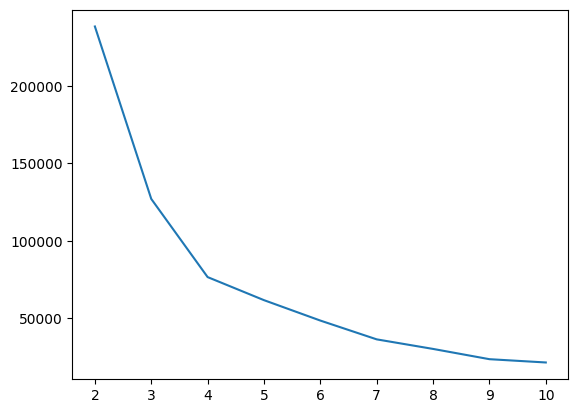

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), inertia_values)